# Notebook by-
## Himel Sarder
## Gmail : info.himelcse@gmail.com

# Feature Construction

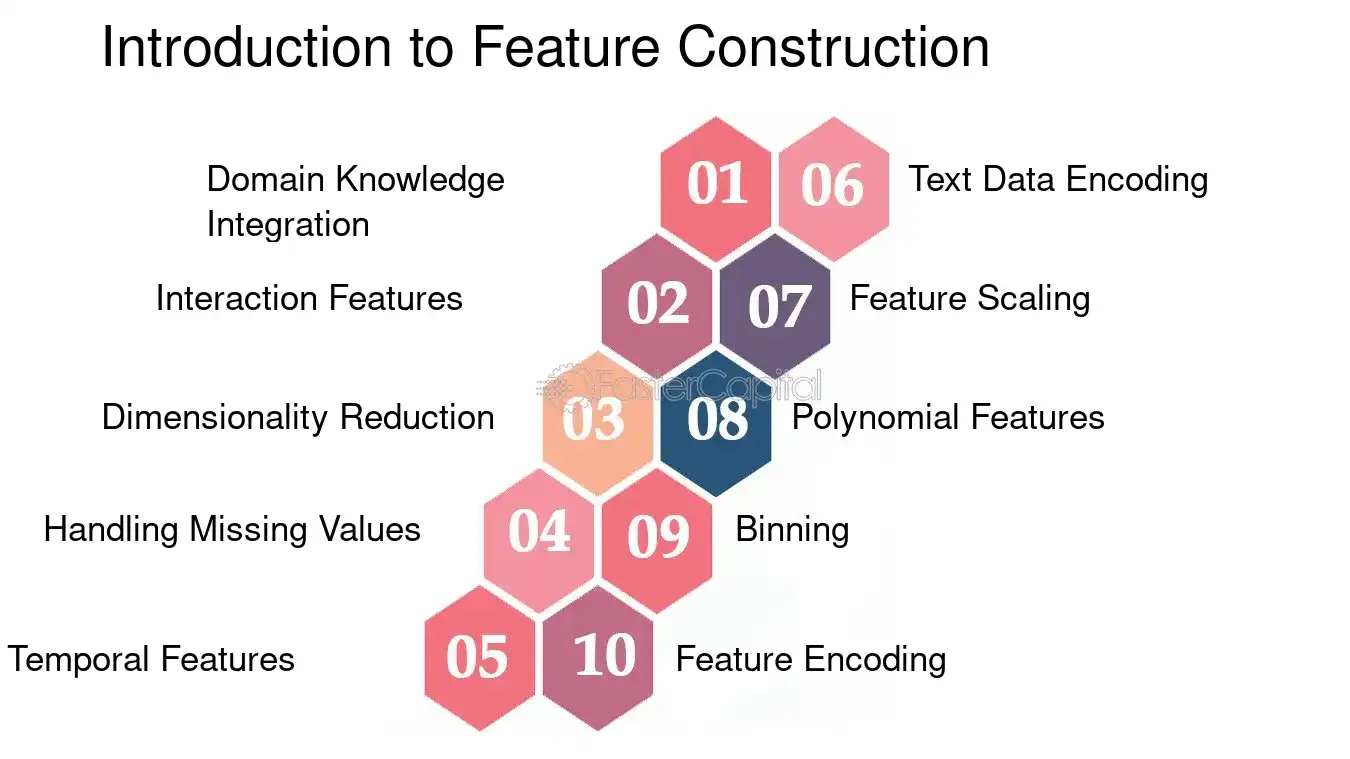

## "Feature Construction" refers to the process of creating new features (variables) from existing data to improve the performance of machine learning models. It is a crucial step in data preprocessing and feature engineering.

### **Steps in Feature Construction:**
1. **Domain Knowledge Utilization:** Use understanding of the problem domain to create meaningful features.
2. **Transformation:** Apply mathematical functions (e.g., log, square root, polynomial features) to enhance patterns in the data.
3. **Combination:** Combine multiple features to create more informative ones (e.g., creating a "total price" feature from "unit price" and "quantity").
4. **Binning:** Convert continuous variables into categorical bins (e.g., age groups: "child," "adult," "senior").
5. **Encoding Categorical Variables:** Convert categorical features into numerical values using one-hot encoding, label encoding, etc.
6. **Time-Based Features:** Extract insights from datetime fields, such as day of the week, hour of the day, or seasonality.
7. **Text Features:** Extract word count, sentiment, or TF-IDF features from text data.
8. **Interaction Features:** Create new features by multiplying or dividing existing ones to capture relationships.
9. **Aggregations:** Summarize data using mean, median, sum, count, etc., to capture statistical trends.

### **Example in Python (Feature Construction with Pandas)**
```python
import pandas as pd
import numpy as np

# Sample dataset
df = pd.DataFrame({
    'price': [100, 200, 150, 300],
    'quantity': [2, 3, 1, 5],
    'date': pd.to_datetime(['2024-01-01', '2024-02-15', '2024-03-10', '2024-04-20'])
})

# Creating new features
df['total_price'] = df['price'] * df['quantity']  # Feature Combination
df['log_price'] = np.log1p(df['price'])  # Log Transformation
df['month'] = df['date'].dt.month  # Extracting month from date
df['high_price'] = df['price'].apply(lambda x: 1 if x > 150 else 0)  # Binning

print(df)
```

### **Example: Feature Construction for Car Sales Data**
Let's say we have a dataset with car listings, including price, mileage, fuel type, and year of manufacture. We'll create new features to improve our model.

#### **Original Dataset**
| Car Model | Price ($) | Mileage (km) | Year | Fuel Type |
|-----------|-----------|--------------|------|------------|
| Toyota Corolla | 15,000 | 80,000 | 2018 | Petrol |
| Honda Civic | 18,500 | 60,000 | 2019 | Petrol |
| Ford Focus | 12,000 | 100,000 | 2016 | Diesel |
| BMW 3 Series | 30,000 | 50,000 | 2020 | Petrol |


### **Feature Construction:**
We'll create new features such as:
- **Car Age:** `Current Year - Year of Manufacture`
- **Price per Kilometer:** `Price / Mileage`
- **Fuel Efficiency Category:** Categorizing cars as "High Efficiency" or "Low Efficiency" based on fuel type.
- **Luxury Indicator:** Marking cars above $25,000 as luxury.

#### **Python Code for Feature Construction**
```python
import pandas as pd
from datetime import datetime

# Sample dataset
data = {
    'Car Model': ['Toyota Corolla', 'Honda Civic', 'Ford Focus', 'BMW 3 Series'],
    'Price': [15000, 18500, 12000, 30000],
    'Mileage': [80000, 60000, 100000, 50000],
    'Year': [2018, 2019, 2016, 2020],
    'Fuel Type': ['Petrol', 'Petrol', 'Diesel', 'Petrol']
}

df = pd.DataFrame(data)

# Feature 1: Car Age
current_year = datetime.now().year
df['Car Age'] = current_year - df['Year']

# Feature 2: Price per Kilometer
df['Price per KM'] = df['Price'] / df['Mileage']

# Feature 3: Fuel Efficiency Category
df['Fuel Efficiency'] = df['Fuel Type'].apply(lambda x: 'High' if x == 'Diesel' else 'Low')

# Feature 4: Luxury Indicator
df['Luxury'] = df['Price'].apply(lambda x: 1 if x > 25000 else 0)

# Display the updated DataFrame
print(df)
```


### **Transformed Dataset (with New Features)**
| Car Model | Price ($) | Mileage (km) | Year | Fuel Type | Car Age | Price per KM | Fuel Efficiency | Luxury |
|-----------|-----------|--------------|------|------------|---------|--------------|----------------|--------|
| Toyota Corolla | 15,000 | 80,000 | 2018 | Petrol | 7 | 0.1875 | Low | 0 |
| Honda Civic | 18,500 | 60,000 | 2019 | Petrol | 6 | 0.3083 | Low | 0 |
| Ford Focus | 12,000 | 100,000 | 2016 | Diesel | 9 | 0.1200 | High | 0 |
| BMW 3 Series | 30,000 | 50,000 | 2020 | Petrol | 5 | 0.6000 | Low | 1 |


### **Key Takeaways**
- **Car Age** helps in price depreciation analysis.
- **Price per KM** helps buyers compare the value of cars.
- **Fuel Efficiency** allows users to filter based on running costs.
- **Luxury Indicator** can be used to show premium listings.

### **Example: Feature Construction for a Library Management System**
In your library system, you might have a dataset of books with details like title, author, genre, publication year, and number of times borrowed. We can create new features to improve recommendations, analysis, and user engagement.

#### **Original Dataset**
| Book Title        | Author           | Genre       | Year Published | Times Borrowed |
|-------------------|-----------------|-------------|---------------|----------------|
| 1984             | George Orwell    | Fiction     | 1949          | 120            |
| To Kill a Mockingbird | Harper Lee   | Fiction     | 1960          | 85             |
| The Great Gatsby | F. Scott Fitzgerald | Fiction | 1925          | 75             |
| Python Crash Course | Eric Matthes  | Programming | 2019          | 150            |


### **Feature Construction:**
We can create the following new features:
1. **Book Age** = `Current Year - Year Published`
2. **Popularity Score** = `Times Borrowed / Book Age` (adjusted for older books)
3. **Is Classic?** = Mark books older than 50 years as "Classic"
4. **Genre Category** = Group genres into broader categories (e.g., Fiction → "Literature")


### **Python Code for Feature Construction**
```python
import pandas as pd
from datetime import datetime

# Sample dataset
data = {
    'Book Title': ['1984', 'To Kill a Mockingbird', 'The Great Gatsby', 'Python Crash Course'],
    'Author': ['George Orwell', 'Harper Lee', 'F. Scott Fitzgerald', 'Eric Matthes'],
    'Genre': ['Fiction', 'Fiction', 'Fiction', 'Programming'],
    'Year Published': [1949, 1960, 1925, 2019],
    'Times Borrowed': [120, 85, 75, 150]
}

df = pd.DataFrame(data)

# Feature 1: Book Age
current_year = datetime.now().year
df['Book Age'] = current_year - df['Year Published']

# Feature 2: Popularity Score (normalized borrowing frequency)
df['Popularity Score'] = df['Times Borrowed'] / (df['Book Age'] + 1)  # Adding 1 to avoid division by zero

# Feature 3: Classic Indicator
df['Is Classic?'] = df['Book Age'].apply(lambda x: 1 if x > 50 else 0)

# Feature 4: Genre Category (Fiction → Literature, Programming → Tech)
genre_mapping = {'Fiction': 'Literature', 'Programming': 'Tech'}
df['Genre Category'] = df['Genre'].map(genre_mapping)

# Display the transformed DataFrame
print(df)
```


### **Transformed Dataset (with New Features)**
| Book Title         | Author             | Genre       | Year Published | Times Borrowed | Book Age | Popularity Score | Is Classic? | Genre Category |
|--------------------|-------------------|------------|---------------|---------------|---------|----------------|------------|----------------|
| 1984              | George Orwell      | Fiction    | 1949          | 120           | 76      | 1.55           | 1          | Literature     |
| To Kill a Mockingbird | Harper Lee     | Fiction    | 1960          | 85            | 65      | 1.29           | 1          | Literature     |
| The Great Gatsby  | F. Scott Fitzgerald | Fiction  | 1925          | 75            | 99      | 0.76           | 1          | Literature     |
| Python Crash Course | Eric Matthes    | Programming | 2019          | 150           | 6       | 21.43          | 0          | Tech           |


### **Why is This Important?**
- **Book Age** helps to analyze how old the books are and recommend newer ones.
- **Popularity Score** allows ranking books based on how frequently they are borrowed relative to their age.
- **Classic Indicator** helps in creating a "Classic Books" section in the library.
- **Genre Category** simplifies search and categorization for users.

In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

import seaborn as sns

In [3]:
df = pd.read_csv('train.csv')[['Age','Pclass','SibSp','Parch','Survived']]

In [4]:
df.head()

,Age,Pclass,SibSp,Parch,Survived
0,22.0,3,1,0,0
1,38.0,1,1,0,1
2,26.0,3,0,0,1
3,35.0,1,1,0,1
4,35.0,3,0,0,0


In [5]:
df.dropna(inplace=True)

In [6]:
df.head()

,Age,Pclass,SibSp,Parch,Survived
0,22.0,3,1,0,0
1,38.0,1,1,0,1
2,26.0,3,0,0,1
3,35.0,1,1,0,1
4,35.0,3,0,0,0


In [7]:
X = df.iloc[:,0:4]
y = df.iloc[:,-1]

In [8]:
X.head()

,Age,Pclass,SibSp,Parch
0,22.0,3,1,0
1,38.0,1,1,0
2,26.0,3,0,0
3,35.0,1,1,0
4,35.0,3,0,0


In [9]:
np.mean(cross_val_score(LogisticRegression(),X,y,scoring='accuracy',cv=20))

0.6933333333333332

## Applying Feature Construction

In [10]:
X['Family_size'] = X['SibSp'] + X['Parch'] + 1

In [11]:
X.head()

,Age,Pclass,SibSp,Parch,Family_size
0,22.0,3,1,0,2
1,38.0,1,1,0,2
2,26.0,3,0,0,1
3,35.0,1,1,0,2
4,35.0,3,0,0,1


In [12]:
def myfunc(num):
    if num == 1:
        #alone
        return 0
    elif num >1 and num <=4:
        # small family
        return 1
    else:
        # large family
        return 2

In [13]:
myfunc(4)

1

In [14]:
X['Family_type'] = X['Family_size'].apply(myfunc)

In [15]:
X.head()

,Age,Pclass,SibSp,Parch,Family_size,Family_type
0,22.0,3,1,0,2,1
1,38.0,1,1,0,2,1
2,26.0,3,0,0,1,0
3,35.0,1,1,0,2,1
4,35.0,3,0,0,1,0


In [16]:
X.drop(columns=['SibSp','Parch','Family_size'],inplace=True)

In [17]:
X.head()

,Age,Pclass,Family_type
0,22.0,3,1
1,38.0,1,1
2,26.0,3,0
3,35.0,1,1
4,35.0,3,0


In [18]:
np.mean(cross_val_score(LogisticRegression(),X,y,scoring='accuracy',cv=20))

0.7003174603174602

# Thank you